# Question 6 Page 170

Suppose we collect data for a group of students in a statistics class with variables 

X1 = hours studied,

X2 = undergrad GPA, and

Y = receive an A. 

We fit a logistic regression and produce estimated coefficient,

ˆβ0 = −6, ˆβ1 = 0.05, ˆβ2 = 1.

(a) Estimate the probability that a student who studies for 40 h and has an undergrad GPA of 3.5 gets an A in the class.

In [1]:
e = 2.719
X1 = 40
X2 = 3.5

B0 = -6
B1 = 0.05
B2 = 1

p = (e**(B0 + B1*X1 + X2)) / (1 + (e**(B0 + B1*X1 + X2)))
cat("Estimated probability of getting an A : ", p)

Estimated probability of getting an A :  0.3775096

(b) How many hours would the student in part (a) need to study to have a 50 % chance of getting an A in the class?

p = 0.5

B0 = -6 \
B1 = 0.05 \
B2 = 1 \

(e^(B0 + B1 * X1 + X2)) / (1 + (e^(B0 + B1 * X1 + X2))) = 0.5 \
Therefore, \
(e^(B0 + B1 * X1 + X2)) = 1 \
(B0 + B1 * X1 + X2) = 0 

In [2]:
X1 = 2.5 / 0.05
cat("Estimated number of hours to study : ", X1)

Estimated number of hours to study :  50

# Question 8 Page 170

Suppose that we take a data set, divide it into equally sized training and test sets, and then try out two different classification procedures. 

First we use logistic regression and get an error rate of 20 % on the training data and 30 % on the test data. 

Next we use 1-nearest neighbors (i.e. K = 1) and get an average error rate (averaged over bothtest and training data sets) of 18%. 

Based on these results, which method should we prefer to use for classification of new observations? Why?

For Logistic Regression : \
Training error = 20% \
Testing error = 30% 

For KNN (n = 1) : \
Training error = 0% (Overfitting) \
Average error = 18% \
Therefor, Testing error = 36%

It is better to use logistic regression (classification).


# Question 9 Page 170

This problem has to do with odds.

(a) On average, what fraction of people with an odds of 0.37 of defaulting on their credit card payment will in fact default?

In [3]:
p_X = 0.37

fraction = p_X / (1 + p_X)

cat("Percent of people that will default : ", fraction)

Percent of people that will default :  0.270073

(b) Suppose that an individual has a 16 % chance of defaulting on her credit card payment. What are the odds that she will default?

In [4]:
p_X = 0.16

fraction = p_X / (1 - p_X)

cat("Percent chance of defaulting : ", fraction*100)

Percent chance of defaulting :  19.04762

# Question 10 Page 171

This question should be answered using the Weekly data set, which is part of the ISLR package. This data is similar in nature to the Smarket data from this chapter’s lab, except that it contains 1,089 weekly returns for 21 years, from the beginning of 1990 to the end of 2010.

In [5]:
library(ISLR)
head(Weekly, n = 10)

Warning message:
"package 'ISLR' was built under R version 3.6.3"

Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1990,0.816,1.572,-3.936,-0.229,-3.484,0.1549760,-0.270,Down
1990,-0.270,0.816,1.572,-3.936,-0.229,0.1485740,-2.576,Down
1990,-2.576,-0.270,0.816,1.572,-3.936,0.1598375,3.514,Up
1990,3.514,-2.576,-0.270,0.816,1.572,0.1616300,0.712,Up
1990,0.712,3.514,-2.576,-0.270,0.816,0.1537280,1.178,Up
1990,1.178,0.712,3.514,-2.576,-0.270,0.1544440,-1.372,Down
1990,-1.372,1.178,0.712,3.514,-2.576,0.1517220,0.807,Up
1990,0.807,-1.372,1.178,0.712,3.514,0.1323100,0.041,Up
1990,0.041,0.807,-1.372,1.178,0.712,0.1439720,1.253,Up
1990,1.253,0.041,0.807,-1.372,1.178,0.1336350,-2.678,Down


(a) Produce some numerical and graphical summaries of the Weekly data. Do there appear to be any patterns?

In [6]:
summary(Weekly)

      Year           Lag1               Lag2               Lag3         
 Min.   :1990   Min.   :-18.1950   Min.   :-18.1950   Min.   :-18.1950  
 1st Qu.:1995   1st Qu.: -1.1540   1st Qu.: -1.1540   1st Qu.: -1.1580  
 Median :2000   Median :  0.2410   Median :  0.2410   Median :  0.2410  
 Mean   :2000   Mean   :  0.1506   Mean   :  0.1511   Mean   :  0.1472  
 3rd Qu.:2005   3rd Qu.:  1.4050   3rd Qu.:  1.4090   3rd Qu.:  1.4090  
 Max.   :2010   Max.   : 12.0260   Max.   : 12.0260   Max.   : 12.0260  
      Lag4               Lag5              Volume            Today         
 Min.   :-18.1950   Min.   :-18.1950   Min.   :0.08747   Min.   :-18.1950  
 1st Qu.: -1.1580   1st Qu.: -1.1660   1st Qu.:0.33202   1st Qu.: -1.1540  
 Median :  0.2380   Median :  0.2340   Median :1.00268   Median :  0.2410  
 Mean   :  0.1458   Mean   :  0.1399   Mean   :1.57462   Mean   :  0.1499  
 3rd Qu.:  1.4090   3rd Qu.:  1.4050   3rd Qu.:2.05373   3rd Qu.:  1.4050  
 Max.   : 12.0260   Max.   : 12.0

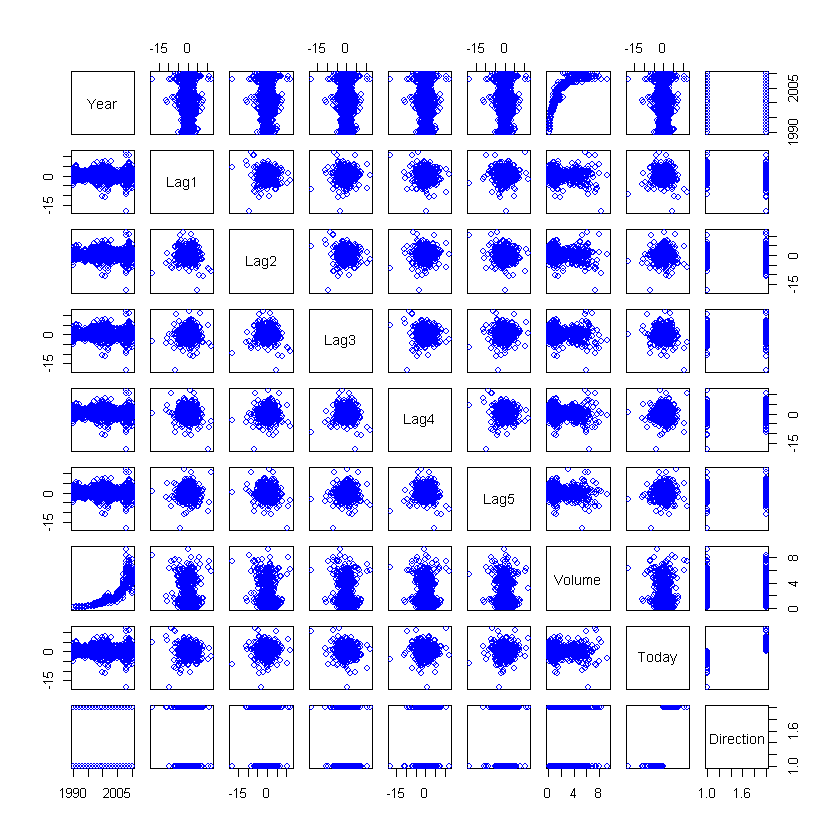

In [7]:
cols <- rep('blue', nrow(Weekly))  # Not default
cols[Weekly$default == 'Yes'] <- 'red'  # Default
pairs(Weekly, col=cols)

(b) Use the full data set to perform a logistic regression with Direction as the response and the five lag variables plus Volume as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?

In [8]:
colnames(Weekly)

[1] "Year"      "Lag1"      "Lag2"      "Lag3"      "Lag4"      "Lag5"     
[7] "Volume"    "Today"     "Direction"

In [9]:
#model_a <- glm(Direction ~ ., data = Weekly, family = binomial)
model_a <- glm(Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume, data = Weekly, family = binomial)
summary(model_a)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Weekly)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6949  -1.2565   0.9913   1.0849   1.4579  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.26686    0.08593   3.106   0.0019 **
Lag1        -0.04127    0.02641  -1.563   0.1181   
Lag2         0.05844    0.02686   2.175   0.0296 * 
Lag3        -0.01606    0.02666  -0.602   0.5469   
Lag4        -0.02779    0.02646  -1.050   0.2937   
Lag5        -0.01447    0.02638  -0.549   0.5833   
Volume      -0.02274    0.03690  -0.616   0.5377   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1496.2  on 1088  degrees of freedom
Residual deviance: 1486.4  on 1082  degrees of freedom
AIC: 1500.4

Number of Fisher Scoring iterations: 4


Only Lag2 is statistically significant.

(c) Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.

In [10]:
# Classes
table(Weekly$Direction)


Down   Up 
 484  605 

In [11]:
Weekly$probability <- predict(model_a, type = "response")
#head(Weekly, n=10)

In [12]:
Weekly$prediction = rep("Down", nrow(Weekly))
Weekly$prediction[Weekly$probability > 0.5] = "Up"
table(Weekly$prediction, Weekly$Direction)

      
       Down  Up
  Down   54  48
  Up    430 557

In [13]:
TP = 557 
TN = 54
FP = 48
FN = 430

Accuracy = (TP + TN) / (TP + TN + FP + FN)
cat("Accuracy : ", Accuracy*100, "%")

Accuracy :  56.10652 %

(d) Now fit the logistic regression model using a training data periodfrom 1990 to 2008, with Lag2 as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).

In [14]:
Weekly_train <- Weekly[Weekly$Year < 2009,]
Weekly_test <- Weekly[Weekly$Year > 2008,]

target <- Weekly_train[,'Direction']

In [15]:
model_b <- glm(Direction ~ Lag2, data = Weekly_train, family = binomial)
summary(model_b)


Call:
glm(formula = Direction ~ Lag2, family = binomial, data = Weekly_train)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.536  -1.264   1.021   1.091   1.368  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.20326    0.06428   3.162  0.00157 **
Lag2         0.05810    0.02870   2.024  0.04298 * 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1354.7  on 984  degrees of freedom
Residual deviance: 1350.5  on 983  degrees of freedom
AIC: 1354.5

Number of Fisher Scoring iterations: 4


In [16]:
probability <- predict(model_b, type = "response", newdata = Weekly_test)
Weekly_test$prediction = rep("Down", nrow(Weekly_test))
Weekly_test$prediction[Weekly_test$probability > 0.5] = "Up"
table(Weekly_test$prediction, Weekly_test$Direction)

      
       Down Up
  Down   17 13
  Up     26 48

In [17]:
TP = 56
TN = 9
FP = 34
FN = 5

Accuracy = (TP + TN) / (TP + TN + FP + FN)
cat("Accuracy : ", Accuracy*100, "%")

Accuracy :  62.5 %

(e) Repeat (d) using LDA.

In [18]:
library(MASS)
lda_a <- lda(Direction ~ Lag2, data = Weekly_train)
summary(lda_a)

Warning message:
"package 'MASS' was built under R version 3.6.3"

        Length Class  Mode     
prior   2      -none- numeric  
counts  2      -none- numeric  
means   2      -none- numeric  
scaling 1      -none- numeric  
lev     2      -none- character
svd     1      -none- numeric  
N       1      -none- numeric  
call    3      -none- call     
terms   3      terms  call     
xlevels 0      -none- list     

In [19]:
lda_prediction = predict(lda_a, newdata = Weekly_test, type="response")
table(lda_prediction$class, Weekly_test$Direction)

      
       Down Up
  Down    9  5
  Up     34 56

In [20]:
TP = 56
TN = 9
FP = 34
FN = 5

Accuracy = (TP + TN) / (TP + TN + FP + FN)
cat("Accuracy : ", Accuracy*100, "%")

Accuracy :  62.5 %

(f) Repeat (d) using QDA.

In [21]:
qda_a = qda(Direction ~ Lag2, data= Weekly_train)
summary(qda_a)

        Length Class  Mode     
prior   2      -none- numeric  
counts  2      -none- numeric  
means   2      -none- numeric  
scaling 2      -none- numeric  
ldet    2      -none- numeric  
lev     2      -none- character
N       1      -none- numeric  
call    3      -none- call     
terms   3      terms  call     
xlevels 0      -none- list     

In [22]:
qda_prediction = predict(qda_a, newdata = Weekly_test, type="response")
table(qda_prediction$class, Weekly_test$Direction)

      
       Down Up
  Down    0  0
  Up     43 61

In [23]:
TP = 61
TN = 0
FP = 43
FN = 0

Accuracy = (TP + TN) / (TP + TN + FP + FN)
cat("Accuracy : ", Accuracy*100, "%")

Accuracy :  58.65385 %

(g) Repeat (d) using KNN with K=1.

In [26]:
library(class)
set.seed(1)
Weekly_train <- Weekly[Weekly$Year < 2009, "Lag2", drop = F]
Weekly_test <- Weekly[Weekly$Year > 2008, "Lag2", drop = F]
train_target <- Weekly[Weekly$Year < 2009, "Direction", drop = T]
test_target <- Weekly[Weekly$Year > 2008, "Direction", drop = T]

In [28]:
knn_a = knn(Weekly_train, Weekly_test, train_target, k = 1)

In [29]:
table(knn_a, test_target)

      test_target
knn_a  Down Up
  Down   21 30
  Up     22 31

In [30]:
TP = 31
TN = 21
FP = 30
FN = 22

Accuracy = (TP + TN) / (TP + TN + FP + FN)
cat("Accuracy : ", Accuracy*100, "%")

Accuracy :  50 %

(h) Which of these methods appears to provide the best results on this data?

Logistic Regression (model_b) and LDA (lda_a) models are better.

(i) Experiment with different combinations of predictors, including possible transformations and interactions, for each of the methods. Report the variables, method, and associated confusion matrix that appears to provide the best results on the heldout data. Note that you should also experiment with values for K in the KNN classifier.

-

# Question 11 Page 171

In this problem, you will develop a model to predict whether a given car gets high or low gas mileage based on the Autodata set.

In [32]:
head(Auto, n = 5)

mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
15,8,350,165,3693,11.5,70,1,buick skylark 320
18,8,318,150,3436,11.0,70,1,plymouth satellite
16,8,304,150,3433,12.0,70,1,amc rebel sst
17,8,302,140,3449,10.5,70,1,ford torino


(a) Create a binary variable, mpg01, that contains a 1 if mpg contains a value above its median, and a 0 if mpg contains a value below its median. You can compute the median using the median() function. Note you may find it helpful to use the data.frame() function to create a single data set containing both mpg01 and the other Auto variables.

In [39]:
Auto$mpg01 <- rep(0, nrow(Auto))
Auto[Auto$mpg > median(Auto$mpg),"mpg01"] <- 1
head(Auto, n = 15)

mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu,0
15,8,350,165,3693,11.5,70,1,buick skylark 320,0
18,8,318,150,3436,11.0,70,1,plymouth satellite,0
16,8,304,150,3433,12.0,70,1,amc rebel sst,0
17,8,302,140,3449,10.5,70,1,ford torino,0
15,8,429,198,4341,10.0,70,1,ford galaxie 500,0
14,8,454,220,4354,9.0,70,1,chevrolet impala,0
14,8,440,215,4312,8.5,70,1,plymouth fury iii,0
14,8,455,225,4425,10.0,70,1,pontiac catalina,0
15,8,390,190,3850,8.5,70,1,amc ambassador dpl,0


(b) Explore the data graphically in order to investigate the association between mpg01 and the other features. Which of the other features seem most likely to be useful in predicting mpg01? Scatter plots and boxplots may be useful tools to answer this question. Describe your findings.

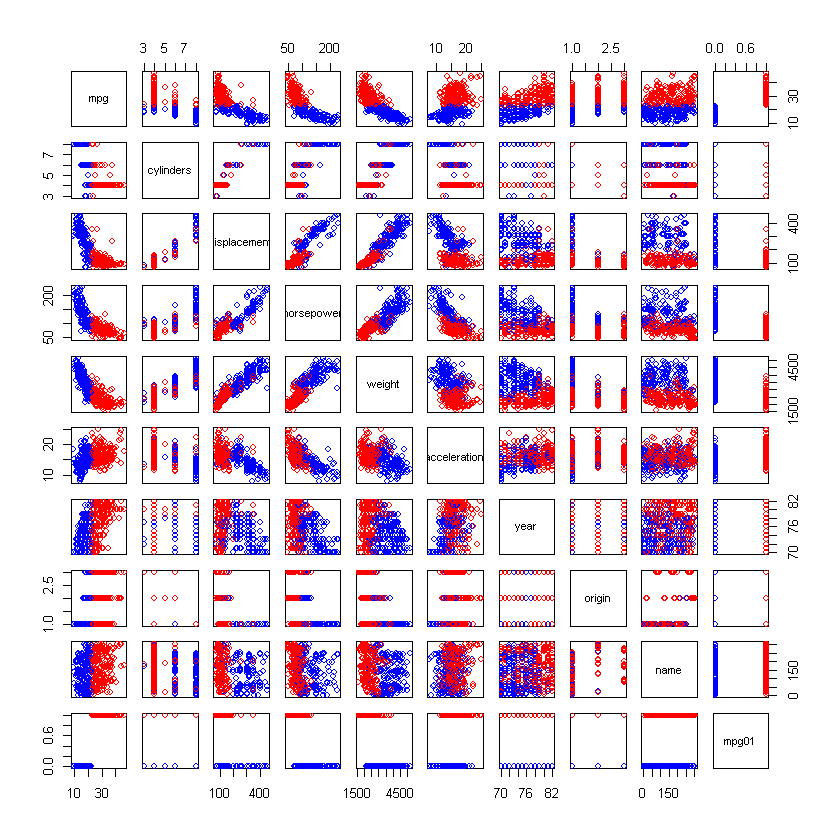

In [40]:
cols <- rep('blue', nrow(Auto))  # Not default
cols[Auto$mpg01 == 1] <- 'red'  # Default
pairs(Auto, col=cols)

(c) Split the data into a training set and a test set.

In [41]:
sample <- floor(0.75 * nrow(Auto))

## set the seed to make your partition reproducible
set.seed(1)
index <- sample(seq_len(nrow(Auto)), size = sample)

train_Auto <- Auto[index,]
test_Auto <- Auto[-index,]

(d) Perform LDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [47]:
colnames(Auto)

[1] "mpg"          "cylinders"    "displacement" "horsepower"   "weight"      
 [6] "acceleration" "year"         "origin"       "name"         "mpg01"

In [49]:
model_a <- glm(mpg01 ~ cylinders + displacement + horsepower + weight + acceleration + year + origin, data = train_Auto)
summary(model_a)


Call:
glm(formula = mpg01 ~ cylinders + displacement + horsepower + 
    weight + acceleration + year + origin, data = train_Auto)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.96877  -0.15219   0.06071   0.18869   0.92377  

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.6160577  0.4715689  -1.306 0.192466    
cylinders    -0.0994971  0.0344183  -2.891 0.004137 ** 
displacement -0.0004507  0.0008000  -0.563 0.573633    
horsepower    0.0021367  0.0013978   1.529 0.127466    
weight       -0.0002404  0.0000671  -3.583 0.000399 ***
acceleration -0.0010671  0.0100113  -0.107 0.915189    
year          0.0290797  0.0052271   5.563 6.08e-08 ***
origin        0.0378556  0.0284376   1.331 0.184190    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 0.08987001)

    Null deviance: 73.446  on 293  degrees of freedom
Residual deviance: 25.703  on 286  d

In [50]:
lda_a <- lda(mpg01 ~ cylinders + weight + year, data = train_Auto)
predictions <- predict(lda_a, test_Auto)
table(predictions$class, test_Auto$mpg01)

   
     0  1
  0 43  0
  1 10 45

In [51]:
TP = 45
TN = 43
FP = 0
FN = 10

Accuracy = (TP + TN) / (TP + TN + FP + FN)
cat("Accuracy : ", Accuracy*100, "%")

Accuracy :  89.79592 %

(e) Perform QDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [53]:
qda_a <- qda(mpg01 ~ cylinders + weight + year, data = train_Auto)
predictions <- predict(qda_a, test_Auto)
table(predictions$class, test_Auto$mpg01)

   
     0  1
  0 45  1
  1  8 44

In [54]:
TP = 44
TN = 45
FP = 8
FN = 1

Accuracy = (TP + TN) / (TP + TN + FP + FN)
cat("Accuracy : ", Accuracy*100, "%")

Accuracy :  90.81633 %

(f) Perform logistic regression on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [56]:
model_b <- glm(mpg01 ~ cylinders + weight + year, data = train_Auto, family=binomial)
test_Auto$probabilities = predict(model_b, test_Auto, type = "response")
test_Auto$predictions = rep(0, nrow(test_Auto))
test_Auto[test_Auto$probabilities > 0.5, 'predictions'] = 1

table(test_Auto$predictions, test_Auto$mpg01)

   
     0  1
  0 46  2
  1  7 43

In [57]:
TP = 43
TN = 46
FP = 2
FN = 7

Accuracy = (TP + TN) / (TP + TN + FP + FN)
cat("Accuracy : ", Accuracy*100, "%")

Accuracy :  90.81633 %

(g) Perform KNN on the training data, with several values of K, in order to predict mpg01. Use only the variables that seemed most associated with mpg01 in (b). What test errors do you obtain? Which value of K seems to perform the best on this data set?

In [59]:
set.seed(1)
train_auto = train_Auto[,c("cylinders", "weight", "year")]
test_auto =  test_Auto[,c("cylinders", "weight", "year")]

train_target = train_Auto[, "mpg01"]
test_target = test_Auto[, "mpg01"]

In [62]:
knn_1 = knn(train_auto, test_auto, train_target, k = 1)
table(knn_1, test_target)
cat("Accuracy when k = 1: ", mean(knn_1 == test_target))


     test_target
knn_1  0  1
    0 45  6
    1  8 39

Accuracy :  0.8571429

In [63]:
knn_2 = knn(train_auto, test_auto, train_target, k = 2)
table(knn_2, test_target)
cat("Accuracy when k = 2: ", mean(knn_2 == test_target))


     test_target
knn_2  0  1
    0 44  6
    1  9 39

Accuracy :  0.8469388

In [64]:
knn_3 = knn(train_auto, test_auto, train_target, k = 3)
table(knn_3, test_target)
cat("Accuracy when k = 3 : ", mean(knn_3 == test_target))


     test_target
knn_3  0  1
    0 46  4
    1  7 41

Accuracy when k = 3 :  0.8877551

In [65]:
knn_4 = knn(train_auto, test_auto, train_target, k = 4)
table(knn_4, test_target)
cat("Accuracy when k = 4 : ", mean(knn_4 == test_target))


     test_target
knn_4  0  1
    0 46  4
    1  7 41

Accuracy when k = 4 :  0.8877551

In [66]:
knn_5 = knn(train_auto, test_auto, train_target, k = 5)
table(knn_5, test_target)
cat("Accuracy when k = 5 : ", mean(knn_5 == test_target))


     test_target
knn_5  0  1
    0 46  6
    1  7 39

Accuracy when k = 5 :  0.8673469